# 長程-建立模型-平均價格_log

**隨機森林**

In [34]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/long_flight_final.csv'
dtype_spec = {
    "停留城市": str  # 指定停留城市欄位為字串
}
data = pd.read_csv(file_path, dtype=dtype_spec)

# One-hot encoding：針對多個分類欄位進行處理
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '機場客運量分類', '航空公司組合', '航空聯盟', '停靠站數量', '是否過夜',
                    '是否為平日', '機型分類', '假期', 'Region', '飛行時間兩段分類', '艙等（主航段）']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化
num_cols = ['停留時間_分鐘', '飛行時間_分鐘', 'Cost of Living Index',
            'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空公司組合_', '航空聯盟_', '停靠站數量_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_', '飛行時間兩段分類_', '艙等（主航段）_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['停留時間_分鐘', '飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數（目標變數為「平均價格_log」）
X = data[feature_cols]
y = data["平均價格_log"]

# === 模型訓練與評估 ===
# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集（70% 訓練，30% 測試）
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立隨機森林回歸模型
    model = RandomForestRegressor(n_estimators=200, random_state=seed, n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 評估模型（MSE 與 R²）
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示結果
results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.085617  0.845601
1   234  0.088146  0.840295
2   345  0.085837  0.843379
3   456  0.085089  0.846771
4   567  0.085101  0.845785


**SVR**

In [35]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# 讀取數據，指定「停留城市」為字串
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/long_flight_final.csv'
dtype_spec = {"停留城市": str}
data = pd.read_csv(file_path, dtype=dtype_spec)

# One-hot encoding：針對多個分類欄位進行處理
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '機場客運量分類', '航空公司組合', '航空聯盟', '停靠站數量', '是否過夜',
                    '是否為平日', '機型分類', '假期', 'Region', '飛行時間兩段分類', '艙等（主航段）']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化
num_cols = ['停留時間_分鐘', '飛行時間_分鐘', 'Cost of Living Index',
            'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空公司組合_', '航空聯盟_', '停靠站數量_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_', '飛行時間兩段分類_', '艙等（主航段）_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['停留時間_分鐘', '飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["平均價格_log"]

# 設定五組隨機種子
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    # 分割數據集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # 建立 SVR 模型
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF 核函數
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 儲存結果
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

# 轉換為 DataFrame 並顯示
results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.136589  0.753679
1   234  0.142528  0.741765
2   345  0.136836  0.750326
3   456  0.139392  0.748980
4   567  0.139891  0.746498


**XGBoost**

In [33]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 讀取數據，指定「停留城市」為字串
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/long_flight_final.csv'
dtype_spec = {"停留城市": str}
data = pd.read_csv(file_path, dtype=dtype_spec)

# One-hot encoding：針對多個分類欄位進行處理
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號',
                    '機場客運量分類', '航空公司組合', '航空聯盟', '停靠站數量', '是否過夜',
                    '是否為平日', '機型分類', '假期', 'Region', '飛行時間兩段分類', '艙等（主航段）']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化
num_cols = ['停留時間_分鐘', '飛行時間_分鐘', 'Cost of Living Index',
            'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空公司組合_', '航空聯盟_', '停靠站數量_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_', '飛行時間兩段分類_', '艙等（主航段）_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['停留時間_分鐘', '飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["平均價格_log"]

# ----------------------------
# 模型訓練與評估：使用 XGBoost (以五個隨機種子測試)
# ----------------------------
seeds = [123, 234, 345, 456, 567]
results = []

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6,
                         random_state=seed, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Seed': seed, 'MSE': mse, 'R^2': r2})

results_df = pd.DataFrame(results)
print(results_df)

   Seed       MSE       R^2
0   123  0.109988  0.801651
1   234  0.117987  0.786229
2   345  0.112283  0.795126
3   456  0.114458  0.793882
4   567  0.113746  0.793875


**30次平均**

In [41]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 讀取數據
file_path = '/Users/yuchingchen/Documents/專題/cleaned_data/long_flight_final.csv'
dtype_spec = {
    "停留城市": str  # 指定 col_28 欄位為字串
}
data = pd.read_csv(file_path, dtype=dtype_spec)

# One-hot encoding
categorical_cols = ['星期', '出發時段', '出發機場代號', '抵達時段', '抵達機場代號', '機場客運量分類',
                    '航空公司', '航空聯盟', '是否過夜', '是否為平日', '機型', '機型分類', '艙等', '假期', 'Region', '飛行時間兩段分類', '艙等（主航段）']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 數值型特徵標準化
num_cols = ['飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# 選取建模特徵
target_keywords = ['出發時段_', '抵達時段_', '航空公司組合_', '航空聯盟_', '停靠站數量_', '是否過夜_', '機型分類_', '是否為平日_', '假期_', 'Region_', '機場客運量分類_', '飛行時間兩段分類_', '艙等（主航段）_']
dummy_cols = [col for col in data.columns if any(keyword in col for keyword in target_keywords)]
feature_cols = dummy_cols + ['停留時間_分鐘', '飛行時間_分鐘', 'Cost of Living Index', 'GDP (PPP) per capita (in thousand USD)', 'competing_flights']

# 定義自變數與目標變數
X = data[feature_cols]
y = data["平均價格_log"]

# 定義要跑的次數 (30 次)
n_runs = 30
seeds = list(range(n_runs))

# 用來儲存結果的字典
results = {
    'RandomForest': {'MSE': [], 'R2': [], 'RMSE': [], 'Adjusted_R2': []},
    'XGBoost': {'MSE': [], 'R2': [], 'RMSE': [], 'Adjusted_R2': []}
}

# p 為特徵數量（自變數數量）
p = X.shape[1]

# 依序對每個隨機種子進行訓練與評估
for seed in seeds:
    # 分割數據集 (70% 訓練，30% 測試)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    n_test = len(y_test)  # 測試集樣本數

    # 隨機森林
    rf_model = RandomForestRegressor(n_estimators=200, random_state=seed, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    adjusted_r_rf = 1 - (1 - r2_rf) * (n_test - 1) / (n_test - p - 1)
    results['RandomForest']['MSE'].append(mse_rf)
    results['RandomForest']['R2'].append(r2_rf)
    results['RandomForest']['RMSE'].append(rmse_rf)
    results['RandomForest']['Adjusted_R2'].append(adjusted_r_rf)
    
    # XGBoost
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=seed, n_jobs=-1)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    adjusted_r_xgb = 1 - (1 - r2_xgb) * (n_test - 1) / (n_test - p - 1)
    results['XGBoost']['MSE'].append(mse_xgb)
    results['XGBoost']['R2'].append(r2_xgb)
    results['XGBoost']['RMSE'].append(rmse_xgb)
    results['XGBoost']['Adjusted_R2'].append(adjusted_r_xgb)

# 計算平均結果
avg_results = {}
for model_name, metrics in results.items():
    avg_mse = np.mean(metrics['MSE'])
    avg_r2 = np.mean(metrics['R2'])
    avg_rmse = np.mean(metrics['RMSE'])
    avg_adjusted_r = np.mean(metrics['Adjusted_R2'])
    avg_results[model_name] = {
        'Average MSE': avg_mse, 
        'Average R2': avg_r2,
        'Average RMSE': avg_rmse,
        'Average Adjusted_R2': avg_adjusted_r
    }

# 顯示結果
print("Average Performance over {} runs:".format(n_runs))
for model, scores in avg_results.items():
    print(f"{model}:")
    print(f"  MSE = {scores['Average MSE']:.4f}")
    print(f"  R^2 = {scores['Average R2']:.4f}")
    print(f"  RMSE = {scores['Average RMSE']:.4f}")
    print(f"  Adjusted R^2 = {scores['Average Adjusted_R2']:.4f}")

Average Performance over 30 runs:
RandomForest:
  MSE = 0.0911
  R^2 = 0.8352
  RMSE = 0.3019
  Adjusted R^2 = 0.8348
XGBoost:
  MSE = 0.1245
  R^2 = 0.7749
  RMSE = 0.3528
  Adjusted R^2 = 0.7744


**視覺化**

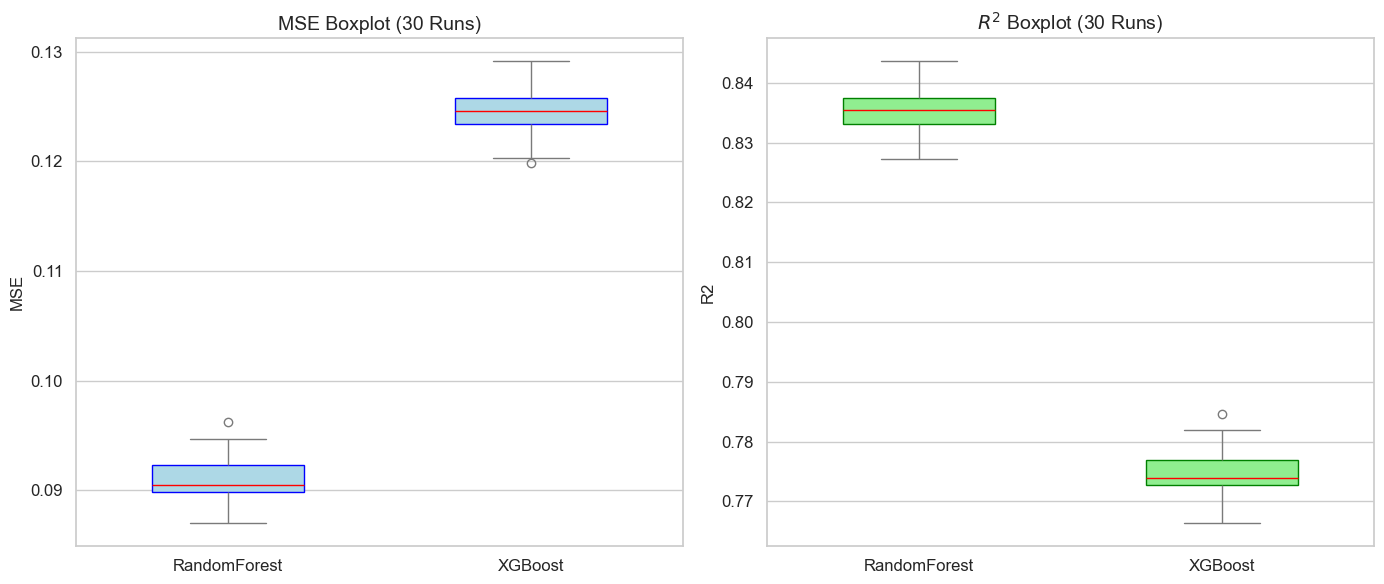

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假設 results 字典已包含各模型 30 次的結果
# 轉換資料格式
mse_df = pd.DataFrame({
    'RandomForest': results['RandomForest']['MSE'],
    'XGBoost': results['XGBoost']['MSE']
})
r2_df = pd.DataFrame({
    'RandomForest': results['RandomForest']['R2'],
    'XGBoost': results['XGBoost']['R2']
})

# 使用 melt 將資料轉為長格式 (long-form)
mse_long = mse_df.melt(var_name='Model', value_name='MSE')
r2_long = r2_df.melt(var_name='Model', value_name='R2')

# 設定 Seaborn 主題
sns.set(style='whitegrid', palette='pastel')

# 建立圖形
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MSE 盒鬚圖
sns.boxplot(x='Model', y='MSE', data=mse_long, ax=axes[0],
            width=0.5, showfliers=True, 
            boxprops={'facecolor':'lightblue', 'edgecolor':'blue'},
            medianprops={'color': 'red'})
axes[0].set_title('MSE Boxplot (30 Runs)', fontsize=14)
axes[0].set_xlabel('')
axes[0].tick_params(labelsize=12)

# R^2 盒鬚圖
sns.boxplot(x='Model', y='R2', data=r2_long, ax=axes[1],
            width=0.5, showfliers=True,
            boxprops={'facecolor':'lightgreen', 'edgecolor':'green'},
            medianprops={'color': 'red'})
axes[1].set_title('$R^2$ Boxplot (30 Runs)', fontsize=14)
axes[1].set_xlabel('')
axes[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()